In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score


In [2]:
# Definir el path al documento CSV
file_path = 'datasets/clustering_database.csv'

# Leer el documento CSV
df = pd.read_csv(file_path)

#Imprimiendo las 5 primeras filas 
df.head()

fullVisitorID channelgrouping      date         OS  Apparel  Office  \
0  2886674552607729793        Referral  20160901      Linux        0       0   
1   876940283010756174        Referral  20160901  Macintosh        1       0   
2  1957458976293878100  Organic Search  20160901    Windows        0       0   
3  3044311821343900129  Organic Search  20160901  Macintosh        0       0   
4  3890747985732303742  Organic Search  20160901  Macintosh        1       0   

   Electronics  LimitedSupply  Accessories  ShopByBrand  Bags  totalSpent_USD  
0            1              0            0            0     0            5.59  
1            0              0            0            0     0           33.99  
2            2              0            0            0     0          329.47  
3            0              0            0            0     0            1.99  
4            0              0            0            0     0           51.99

In [3]:
# Observando el tipo de información del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38670 entries, 0 to 38669
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   fullVisitorID    38670 non-null  uint64 
 1   channelgrouping  38670 non-null  object 
 2   date             38670 non-null  int64  
 3   OS               38670 non-null  object 
 4   Apparel          38670 non-null  int64  
 5   Office           38670 non-null  int64  
 6   Electronics      38670 non-null  int64  
 7   LimitedSupply    38670 non-null  int64  
 8   Accessories      38670 non-null  int64  
 9   ShopByBrand      38670 non-null  int64  
 10  Bags             38670 non-null  int64  
 11  totalSpent_USD   38670 non-null  float64
dtypes: float64(1), int64(8), object(2), uint64(1)
memory usage: 3.5+ MB


La definición de las variables son las siguientes:
* `fullVisitorID`: Identificador del cliente
* `channelgrouping`: Medio por el cual llegó al sitio web
* `date`: dia
* `OS`: Tipo de dispositivo con el que entro al sitio web
* `Apparel`, `Office`, `Electronics`, `LimitedSupply`, `Accessories`, `ShopByBrand`, `Bags`: Categorias de los productos comprados
* `totalSpent_USD`: Total gastado


Por cada variable, tenemos una cantidad de valores, veamos:
* La cantidad de medios que se tienen en `channelgrouping` .
* Los días estudiados y el año `date`.
* El tipo de dispositivo con el que se entro al sitio web con `OS`.

In [4]:
# Lista de columnas para ver elementos únicos
_list = ["channelgrouping", "date", "OS"]

for column in _list:
    unique_values = df[column].unique()
    if column == "date":
        list_year_unique_values = list(set([str(value)[:4] for value in unique_values]))
        list_month_unique_values = list(set([str(value)[4:6] for value in unique_values]))
        list_month_unique_values.sort()
        print(f"Para la columna `{column}` se tienen que los años de estudio son (es):\n{list_year_unique_values}")
        print(f"y para los meses {list_month_unique_values}.\n")
    else:
        print(f"Para la columna `{column}` se tienen que los valores únicos son:\n{unique_values}\n")

Para la columna `channelgrouping` se tienen que los valores únicos son:
['Referral' 'Organic Search' 'Paid Search' 'Direct' 'Social' 'Display'
 'Affiliates']

Para la columna `date` se tienen que los años de estudio son (es):
['2016']
y para los meses ['08', '09', '10', '11', '12'].

Para la columna `OS` se tienen que los valores únicos son:
['Linux' 'Macintosh' 'Windows' 'Chrome OS' 'Android' 'iOS' 'Windows Phone'
 '(not set)' 'BlackBerry' 'SunOS']



In [5]:
df.describe()

fullVisitorID          date       Apparel        Office   Electronics  \
count   3.867000e+04  3.867000e+04  38670.000000  38670.000000  38670.000000   
mean    4.483221e+18  2.016100e+07      1.945074      0.531601      0.523946   
std     3.058644e+18  1.458918e+02      4.751453      2.685681      1.875687   
min     5.103959e+12  2.016080e+07      0.000000      0.000000      0.000000   
25%     1.606532e+18  2.016090e+07      0.000000      0.000000      0.000000   
50%     4.344901e+18  2.016101e+07      0.000000      0.000000      0.000000   
75%     7.135485e+18  2.016112e+07      2.000000      0.000000      0.000000   
max     9.999801e+18  2.016123e+07    200.000000    340.000000    103.000000   

       LimitedSupply   Accessories   ShopByBrand          Bags  totalSpent_USD  
count   38670.000000  38670.000000  38670.000000  38670.000000    38670.000000  
mean        0.107292      0.474321      0.313757      0.551565      171.123992  
std         0.798183      1.813800      1.617949      1.792594      281.290067  
min         0.000000      0.000000      0.000000      0.000000        0.000000  
25%         0.000000      0.000000      0.000000      0.000000       29.970000  
50%         0.000000      0.000000      0.000000      0.000000       79.960000  
75%         0.000000      0.000000      0.000000      0.000000      199.980000  
max        30.000000     99.000000     68.000000     48.000000     8673.740000

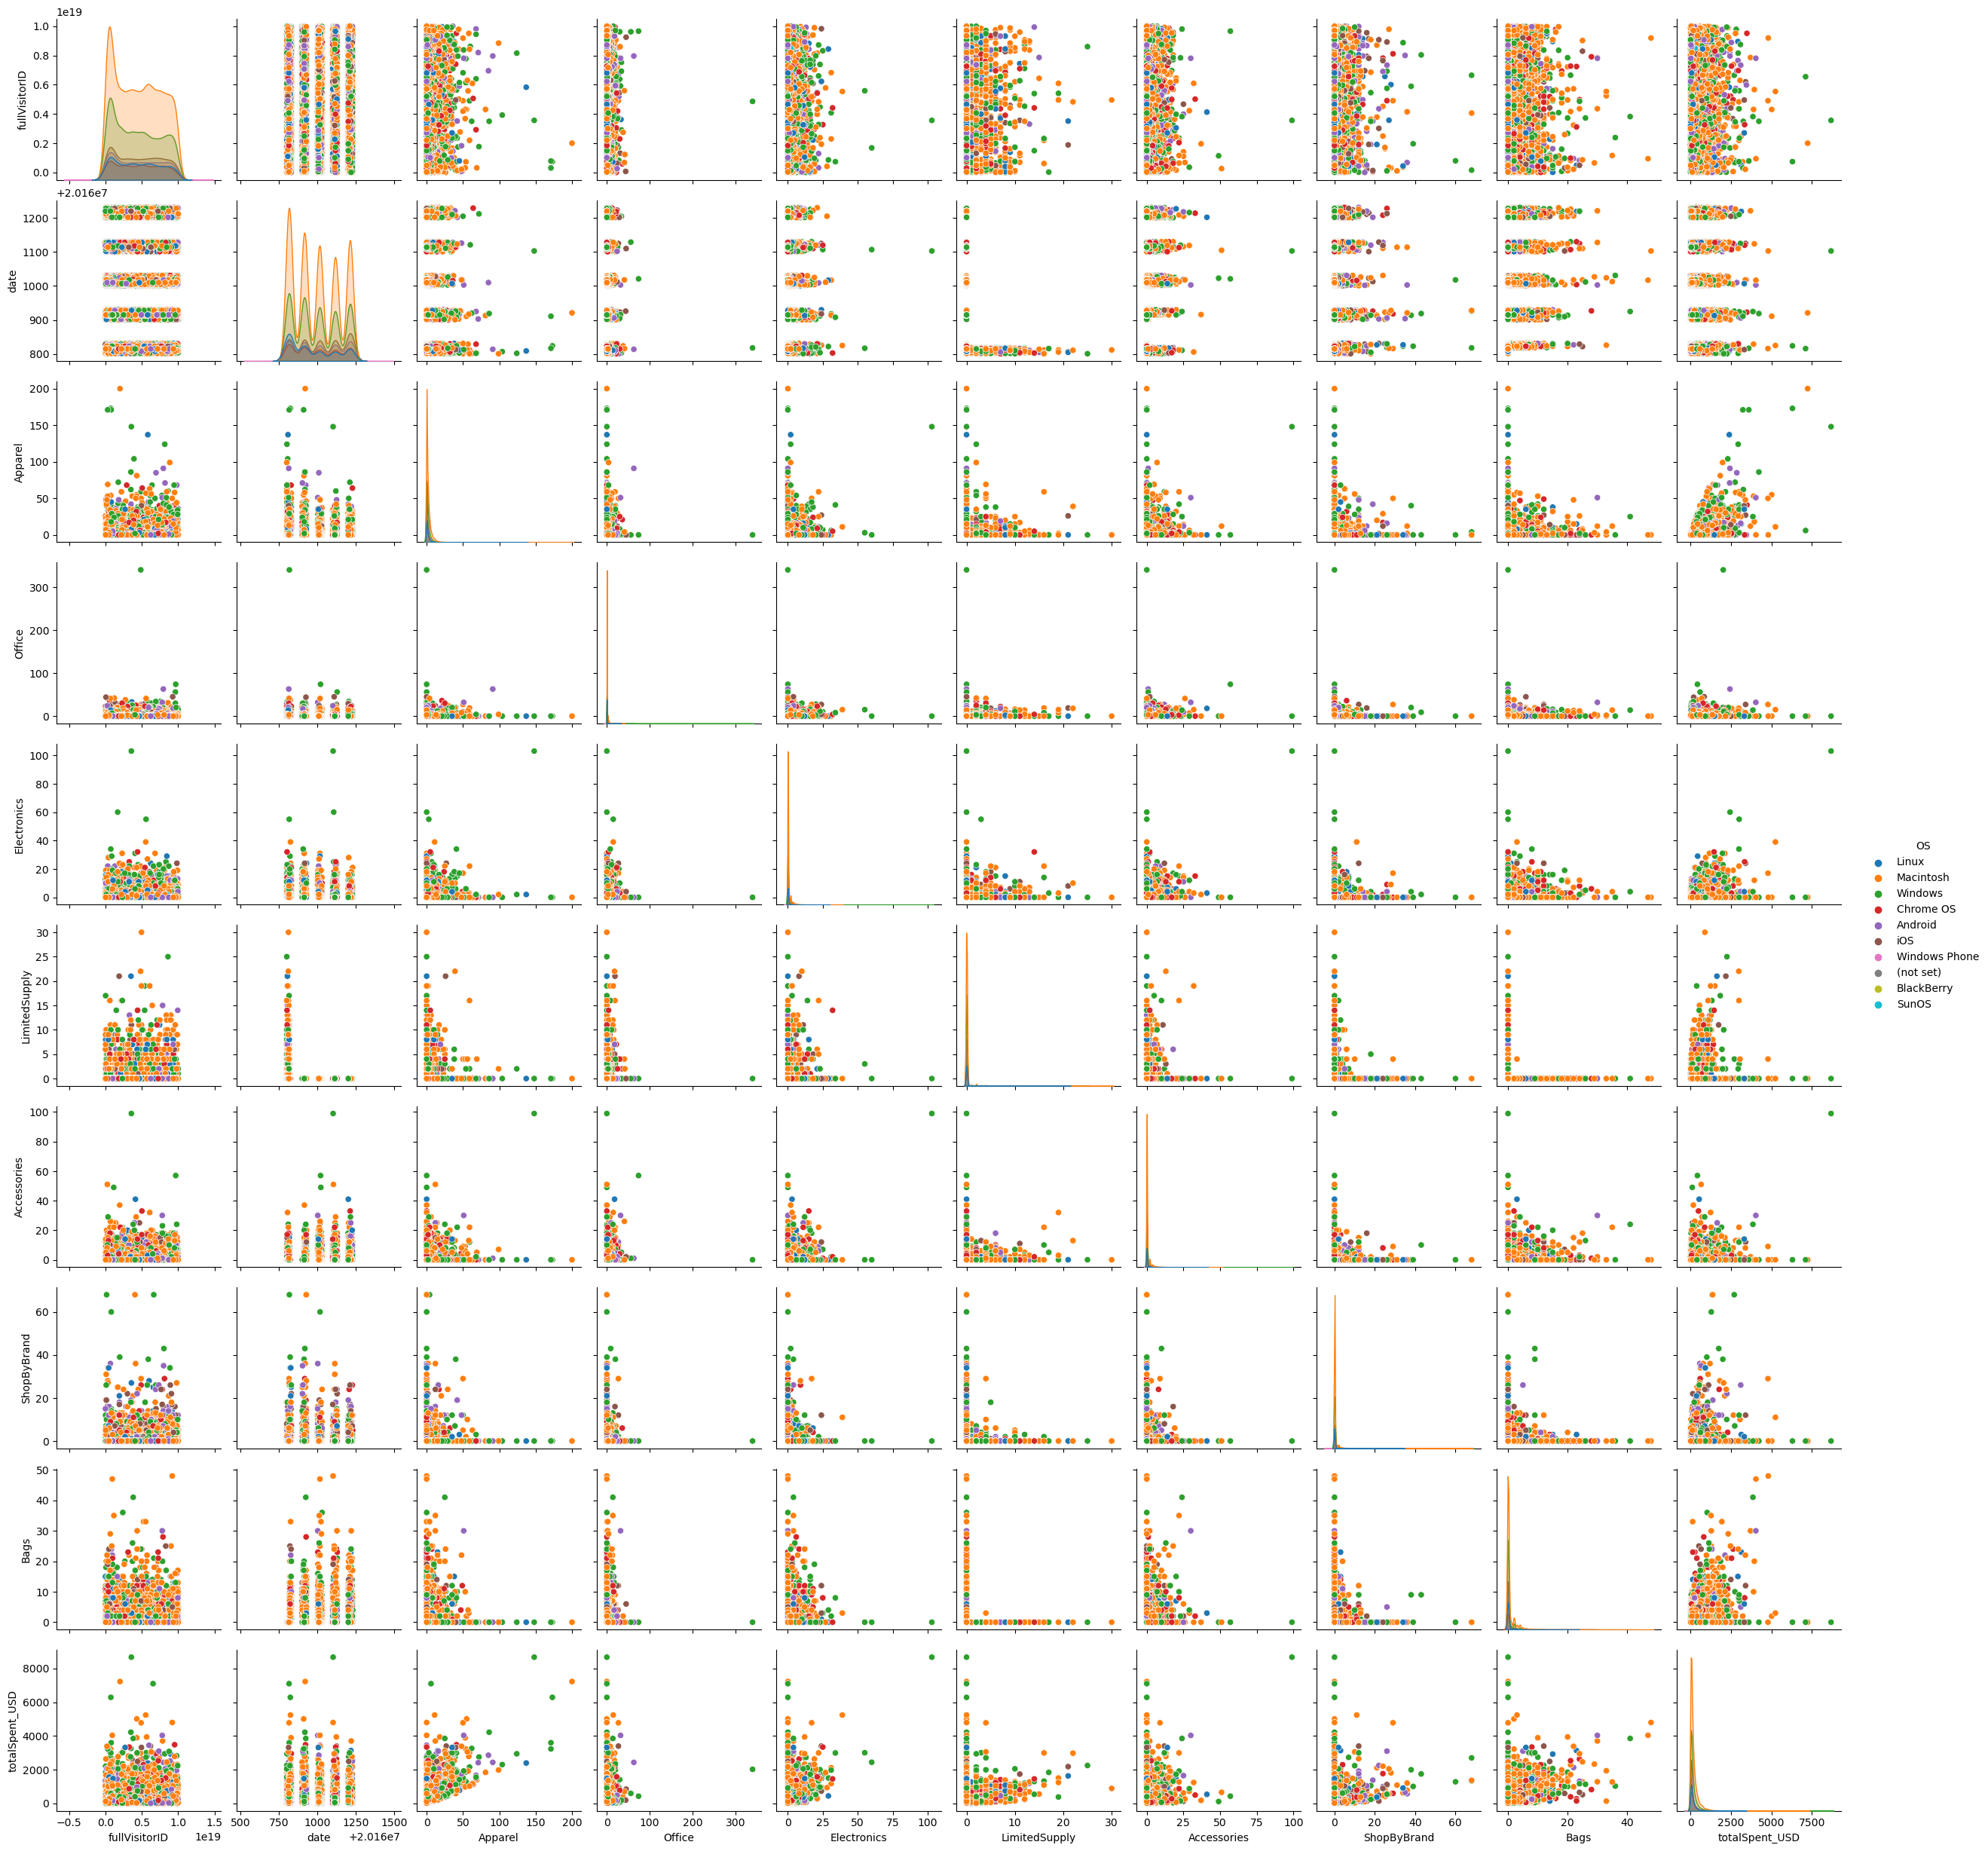

In [6]:
sns.pairplot(df, hue='OS')
plt.show()

In [7]:
df.head()

fullVisitorID channelgrouping      date         OS  Apparel  Office  \
0  2886674552607729793        Referral  20160901      Linux        0       0   
1   876940283010756174        Referral  20160901  Macintosh        1       0   
2  1957458976293878100  Organic Search  20160901    Windows        0       0   
3  3044311821343900129  Organic Search  20160901  Macintosh        0       0   
4  3890747985732303742  Organic Search  20160901  Macintosh        1       0   

   Electronics  LimitedSupply  Accessories  ShopByBrand  Bags  totalSpent_USD  
0            1              0            0            0     0            5.59  
1            0              0            0            0     0           33.99  
2            2              0            0            0     0          329.47  
3            0              0            0            0     0            1.99  
4            0              0            0            0     0           51.99

Gráficas a revisar:
* Diagrama de frecuencias de cantidad de transacciones realizadas del medio por el cual se hizo la solicitud.
* Diagrama de frecuencias de cantidad de transacciones realizadas del medio por el cual se hizo la solicitud.
* Fechas vs cantidad de compras por categoría de producto.
* Fechas vs Total gastado.
* Diagrama de barras de la cantidad de productos comprados por categoría.
* Histograma de la información del total gastado. 
* Clasificar por Medio y ver digrama de barras por monto total gastado.
* Clasificar por Dispositivo utilizado y ver digrama de barras por monto total gastado.


Dado que se desea encontrar 3 clusters para segmentar la información, vamos a utilizar varios algoritmos de Machine Learning no supervisados:

## K-means

Para el planteamiento de un modelo usando K-Means, es importante tener en cuenta que la información con la que trabajemos debe estar normalizada para que no se generen sesgos en las conclusiones del modelo, con esto aseguramos que todas las variables trabajen sobre la misma escala. De igual modo es importante trabajar con variables númericas para que se pueda entrenar el modelo.

In [8]:
df.columns

Index(['fullVisitorID', 'channelgrouping', 'date', 'OS', 'Apparel', 'Office',
       'Electronics', 'LimitedSupply', 'Accessories', 'ShopByBrand', 'Bags',
       'totalSpent_USD'],
      dtype='object')

In [9]:
_list_columns_to_normalize = ['Apparel', 'Office','Electronics', 'LimitedSupply', 'Accessories', 'ShopByBrand', 'Bags','totalSpent_USD']
scaler = MinMaxScaler()

# Copiar el dataset original
scaled_df = df.copy()

# Normalizamos las columnas
scaled_df[_list_columns_to_normalize] = scaler.fit_transform(df[_list_columns_to_normalize])
scaled_df

fullVisitorID channelgrouping      date         OS  Apparel  \
0      2886674552607729793        Referral  20160901      Linux    0.000   
1       876940283010756174        Referral  20160901  Macintosh    0.005   
2      1957458976293878100  Organic Search  20160901    Windows    0.000   
3      3044311821343900129  Organic Search  20160901  Macintosh    0.000   
4      3890747985732303742  Organic Search  20160901  Macintosh    0.005   
...                    ...             ...       ...        ...      ...   
38665    36419370338727902        Referral  20160815  Macintosh    0.000   
38666  9343451790412717460  Organic Search  20160815  Macintosh    0.075   
38667  4064276550480783428     Paid Search  20160815    Windows    0.010   
38668  7171290027410037351        Referral  20160815  Macintosh    0.065   
38669  8064512865546141978          Direct  20160815  Macintosh    0.000   

         Office  Electronics  LimitedSupply  Accessories  ShopByBrand  Bags  \
0      0.000000     0.009709       0.000000     0.000000     0.000000   0.0   
1      0.000000     0.000000       0.000000     0.000000     0.000000   0.0   
2      0.000000     0.019417       0.000000     0.000000     0.000000   0.0   
3      0.000000     0.000000       0.000000     0.000000     0.000000   0.0   
4      0.000000     0.000000       0.000000     0.000000     0.000000   0.0   
...         ...          ...            ...          ...          ...   ...   
38665  0.000000     0.000000       0.000000     0.000000     0.073529   0.0   
38666  0.000000     0.000000       0.000000     0.000000     0.000000   0.0   
38667  0.008824     0.058252       0.066667     0.000000     0.000000   0.0   
38668  0.008824     0.019417       0.133333     0.010101     0.088235   0.0   
38669  0.008824     0.077670       0.200000     0.060606     0.000000   0.0   

       totalSpent_USD  
0            0.000644  
1            0.003919  
2            0.037985  
3            0.000229  
4            0.005994  
...               ...  
38665        0.013550  
38666        0.050249  
38667        0.046221  
38668        0.156024  
38669        0.067658  

[38670 rows x 12 columns]

### Usando el método Elbow

Vamos a utilizar "the elbow method" para determinar cual es la cantidad de cluster que mejor decriben el problema. Para esto generamos una lista llamada `wcss` que significa "Within-Cluster Sum of Square", el cual nos permite determinar el error de acuerdo a cada uno de los cluster obtenidos. Este determina la suma de los errores al cuadrado de cada punto en el cluster con respecto al centroide del cluster. 

In [10]:
wcss = []
number_cluster = []

#Entrenando el modelo para k-clusters
for k in range(1, 11):
    dataframe = scaled_df[['Apparel', 'Office','Electronics', 'LimitedSupply', 'Accessories', 'ShopByBrand', 'Bags','totalSpent_USD']]
    kmeans = KMeans(n_clusters=k, init='random', random_state=10213)
    kmeans.fit(dataframe)
    wcss.append(kmeans.inertia_)
    number_cluster.append(k)

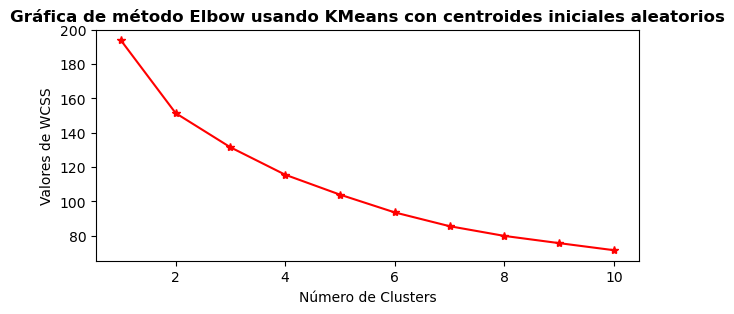

In [11]:
# Gráfico de Elbow
plt.figure(figsize=(7, 3))
plt.plot(number_cluster, wcss, 'r*-')
plt.xlabel('Número de Clusters')
plt.ylabel('Valores de WCSS')
plt.title('Gráfica de método Elbow usando KMeans con centroides iniciales aleatorios', fontsize=12, fontweight='bold')
plt.show()

Podemos observar que la tasa de decremiento a partir de cada cluster no es significativa cuando esta entre 3 y 4. 
De este modo vamos a considerar el tanto una clasificación con los 3 clusters y la de 4 clusters.

### Usando el método  coeficiente Silhouette

In [12]:
silhouette_avg = []
number_cluster = []

#Entrenando el modelo para k-clusters
for k in range(2, 11):
    data_frame = scaled_df[['Apparel', 'Office','Electronics', 'LimitedSupply', 'Accessories', 'ShopByBrand', 'Bags','totalSpent_USD']]
    kmeans = KMeans(n_clusters=k, init='random', random_state=10213)
    kmeans.fit(data_frame)
    cluster_labels = kmeans.labels_
    silhouette_avg.append(silhouette_score(data_frame, cluster_labels))
    number_cluster.append(k)

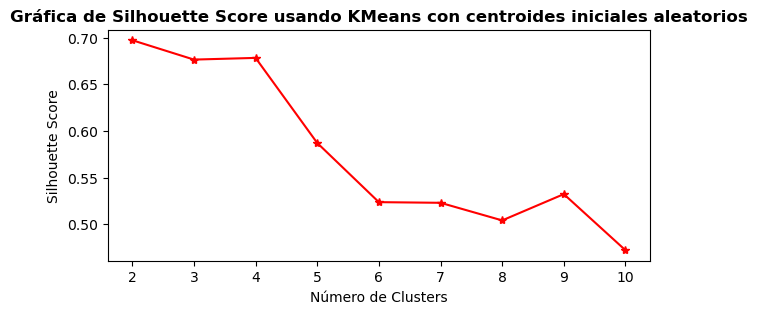

In [13]:
# Gráfico usando Silhouette Score
plt.figure(figsize=(7, 3))
plt.plot(number_cluster, silhouette_avg, 'r*-')
plt.xlabel('Número de Clusters')
plt.ylabel('Silhouette Score')
plt.title('Gráfica de Silhouette Score usando KMeans con centroides iniciales aleatorios', fontsize=12, fontweight='bold')
plt.show()

Combinando tanto la descripción utilizando el método Elbow, como Silhouettes Score, podemos determinar que es 3 es el mejor candidato para generar los k-clusters del método K-Means.

In [19]:
# Inicializando K-Means
kmeans = KMeans(n_clusters=4)
dataframe = scaled_df[['Apparel', 'Office','Electronics', 'LimitedSupply', 'Accessories', 'ShopByBrand', 'Bags','totalSpent_USD']]
# Entrenando el modelo
kmeans.fit(dataframe)
# Agregando los valores de los clusters
dataframe['Cluster'] = kmeans.labels_
dataframe

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4720\3719891315.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['Cluster'] = kmeans.labels_


Apparel    Office  Electronics  LimitedSupply  Accessories  \
0        0.000  0.000000     0.009709       0.000000     0.000000   
1        0.005  0.000000     0.000000       0.000000     0.000000   
2        0.000  0.000000     0.019417       0.000000     0.000000   
3        0.000  0.000000     0.000000       0.000000     0.000000   
4        0.005  0.000000     0.000000       0.000000     0.000000   
...        ...       ...          ...            ...          ...   
38665    0.000  0.000000     0.000000       0.000000     0.000000   
38666    0.075  0.000000     0.000000       0.000000     0.000000   
38667    0.010  0.008824     0.058252       0.066667     0.000000   
38668    0.065  0.008824     0.019417       0.133333     0.010101   
38669    0.000  0.008824     0.077670       0.200000     0.060606   

       ShopByBrand  Bags  totalSpent_USD  Cluster  
0         0.000000   0.0        0.000644        0  
1         0.000000   0.0        0.003919        0  
2         0.000000   0.0        0.037985        0  
3         0.000000   0.0        0.000229        0  
4         0.000000   0.0        0.005994        0  
...            ...   ...             ...      ...  
38665     0.073529   0.0        0.013550        0  
38666     0.000000   0.0        0.050249        3  
38667     0.000000   0.0        0.046221        0  
38668     0.088235   0.0        0.156024        3  
38669     0.000000   0.0        0.067658        2  

[38670 rows x 9 columns]

In [20]:
dataframe.columns

Index(['Apparel', 'Office', 'Electronics', 'LimitedSupply', 'Accessories',
       'ShopByBrand', 'Bags', 'totalSpent_USD', 'Cluster'],
      dtype='object')

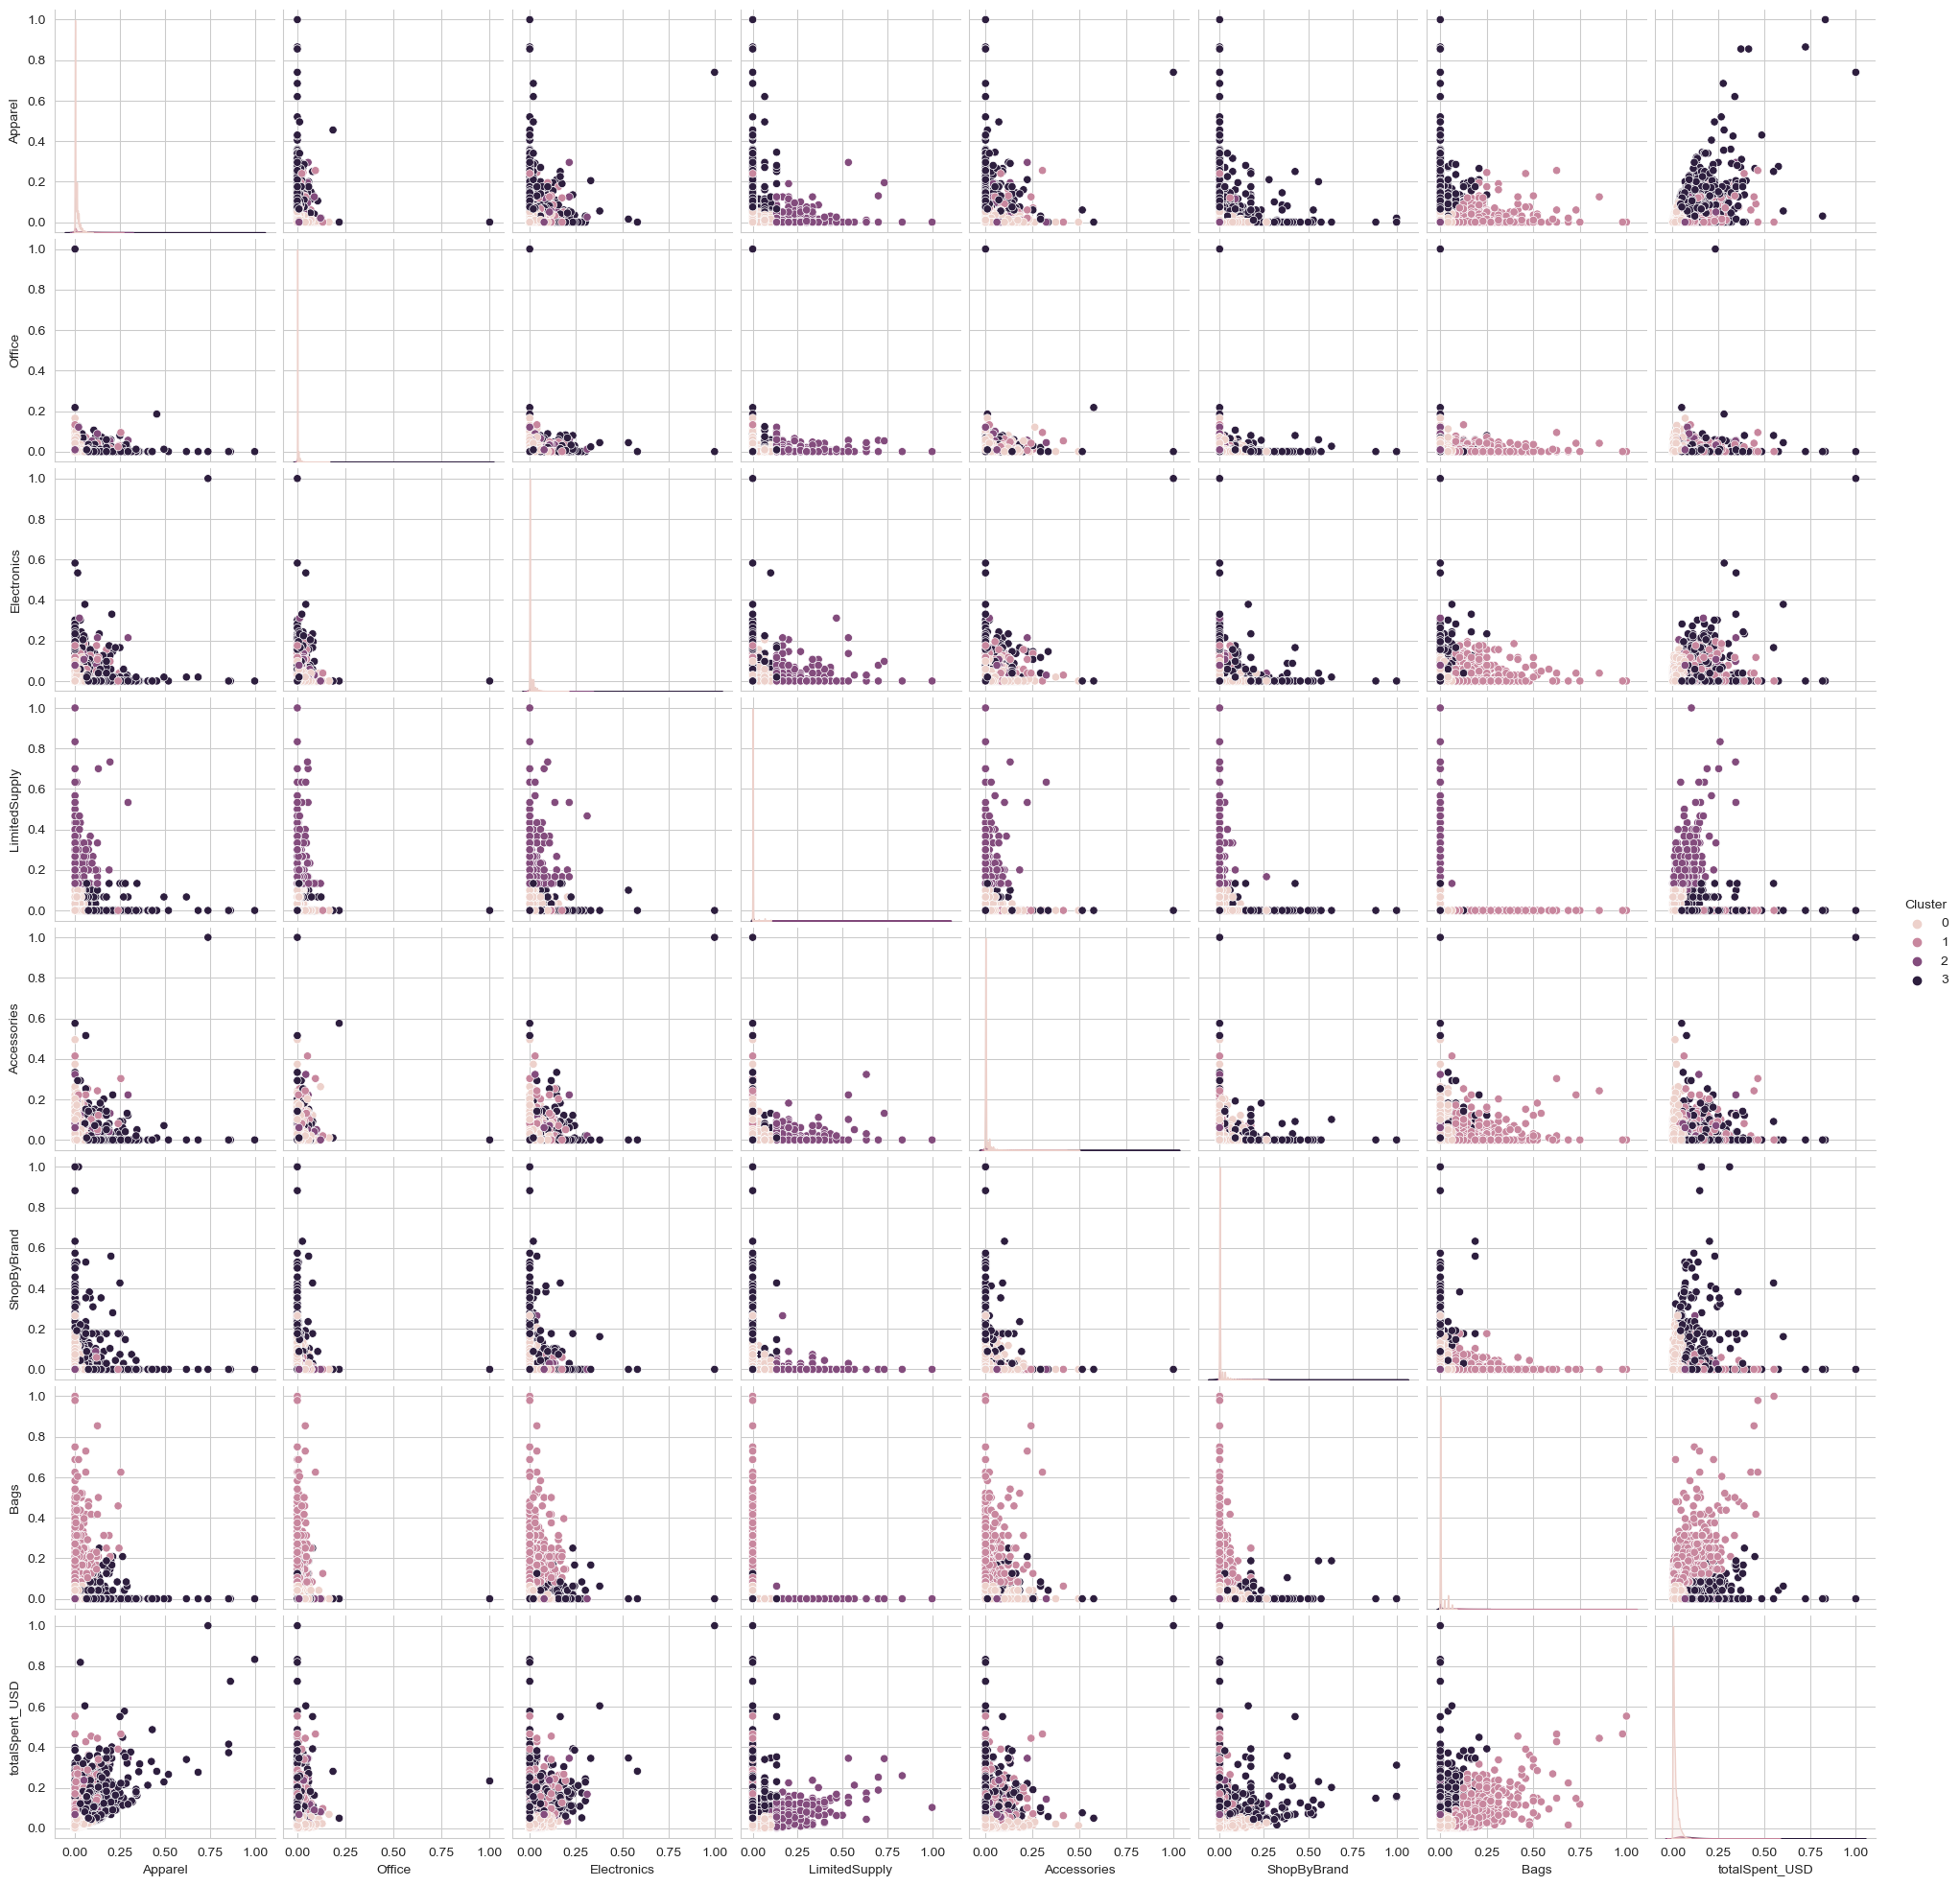

In [21]:
sns.pairplot(dataframe, hue='Cluster')
plt.show()

<Figure size 1500x800 with 0 Axes>

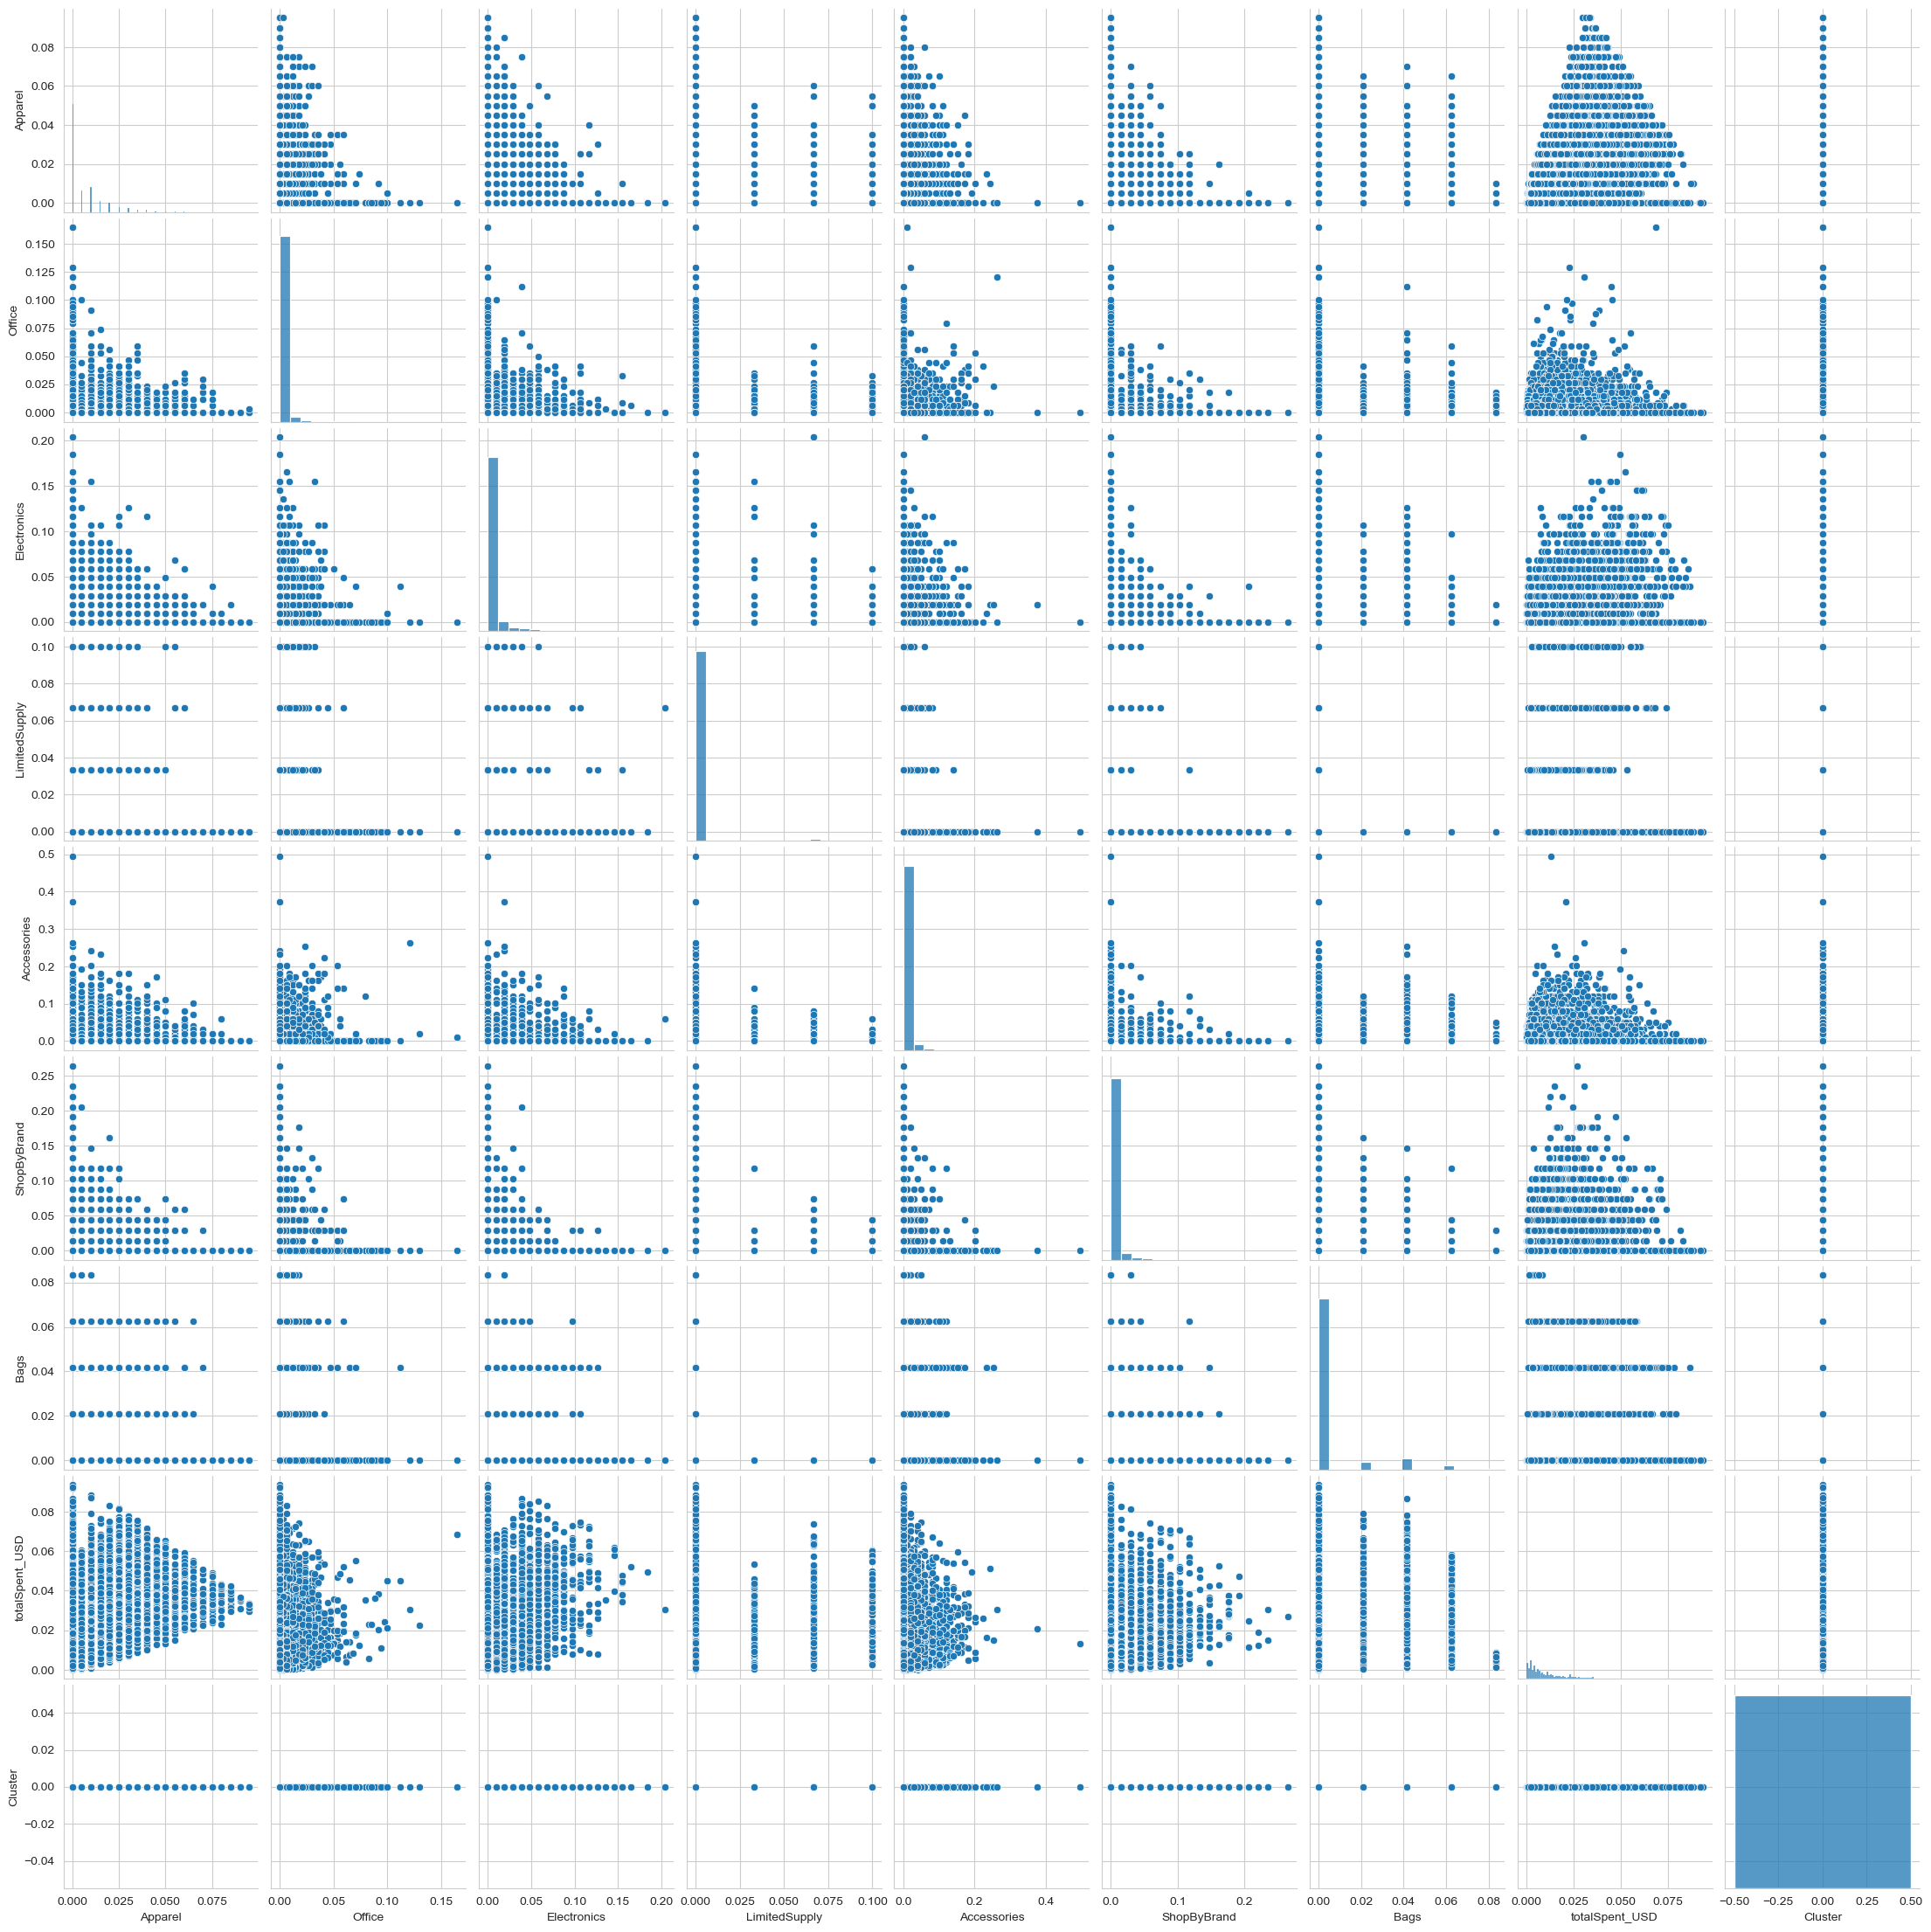

In [23]:
df0 = dataframe[dataframe['Cluster'] == 0]
sns.pairplot(df0)
plt.show()

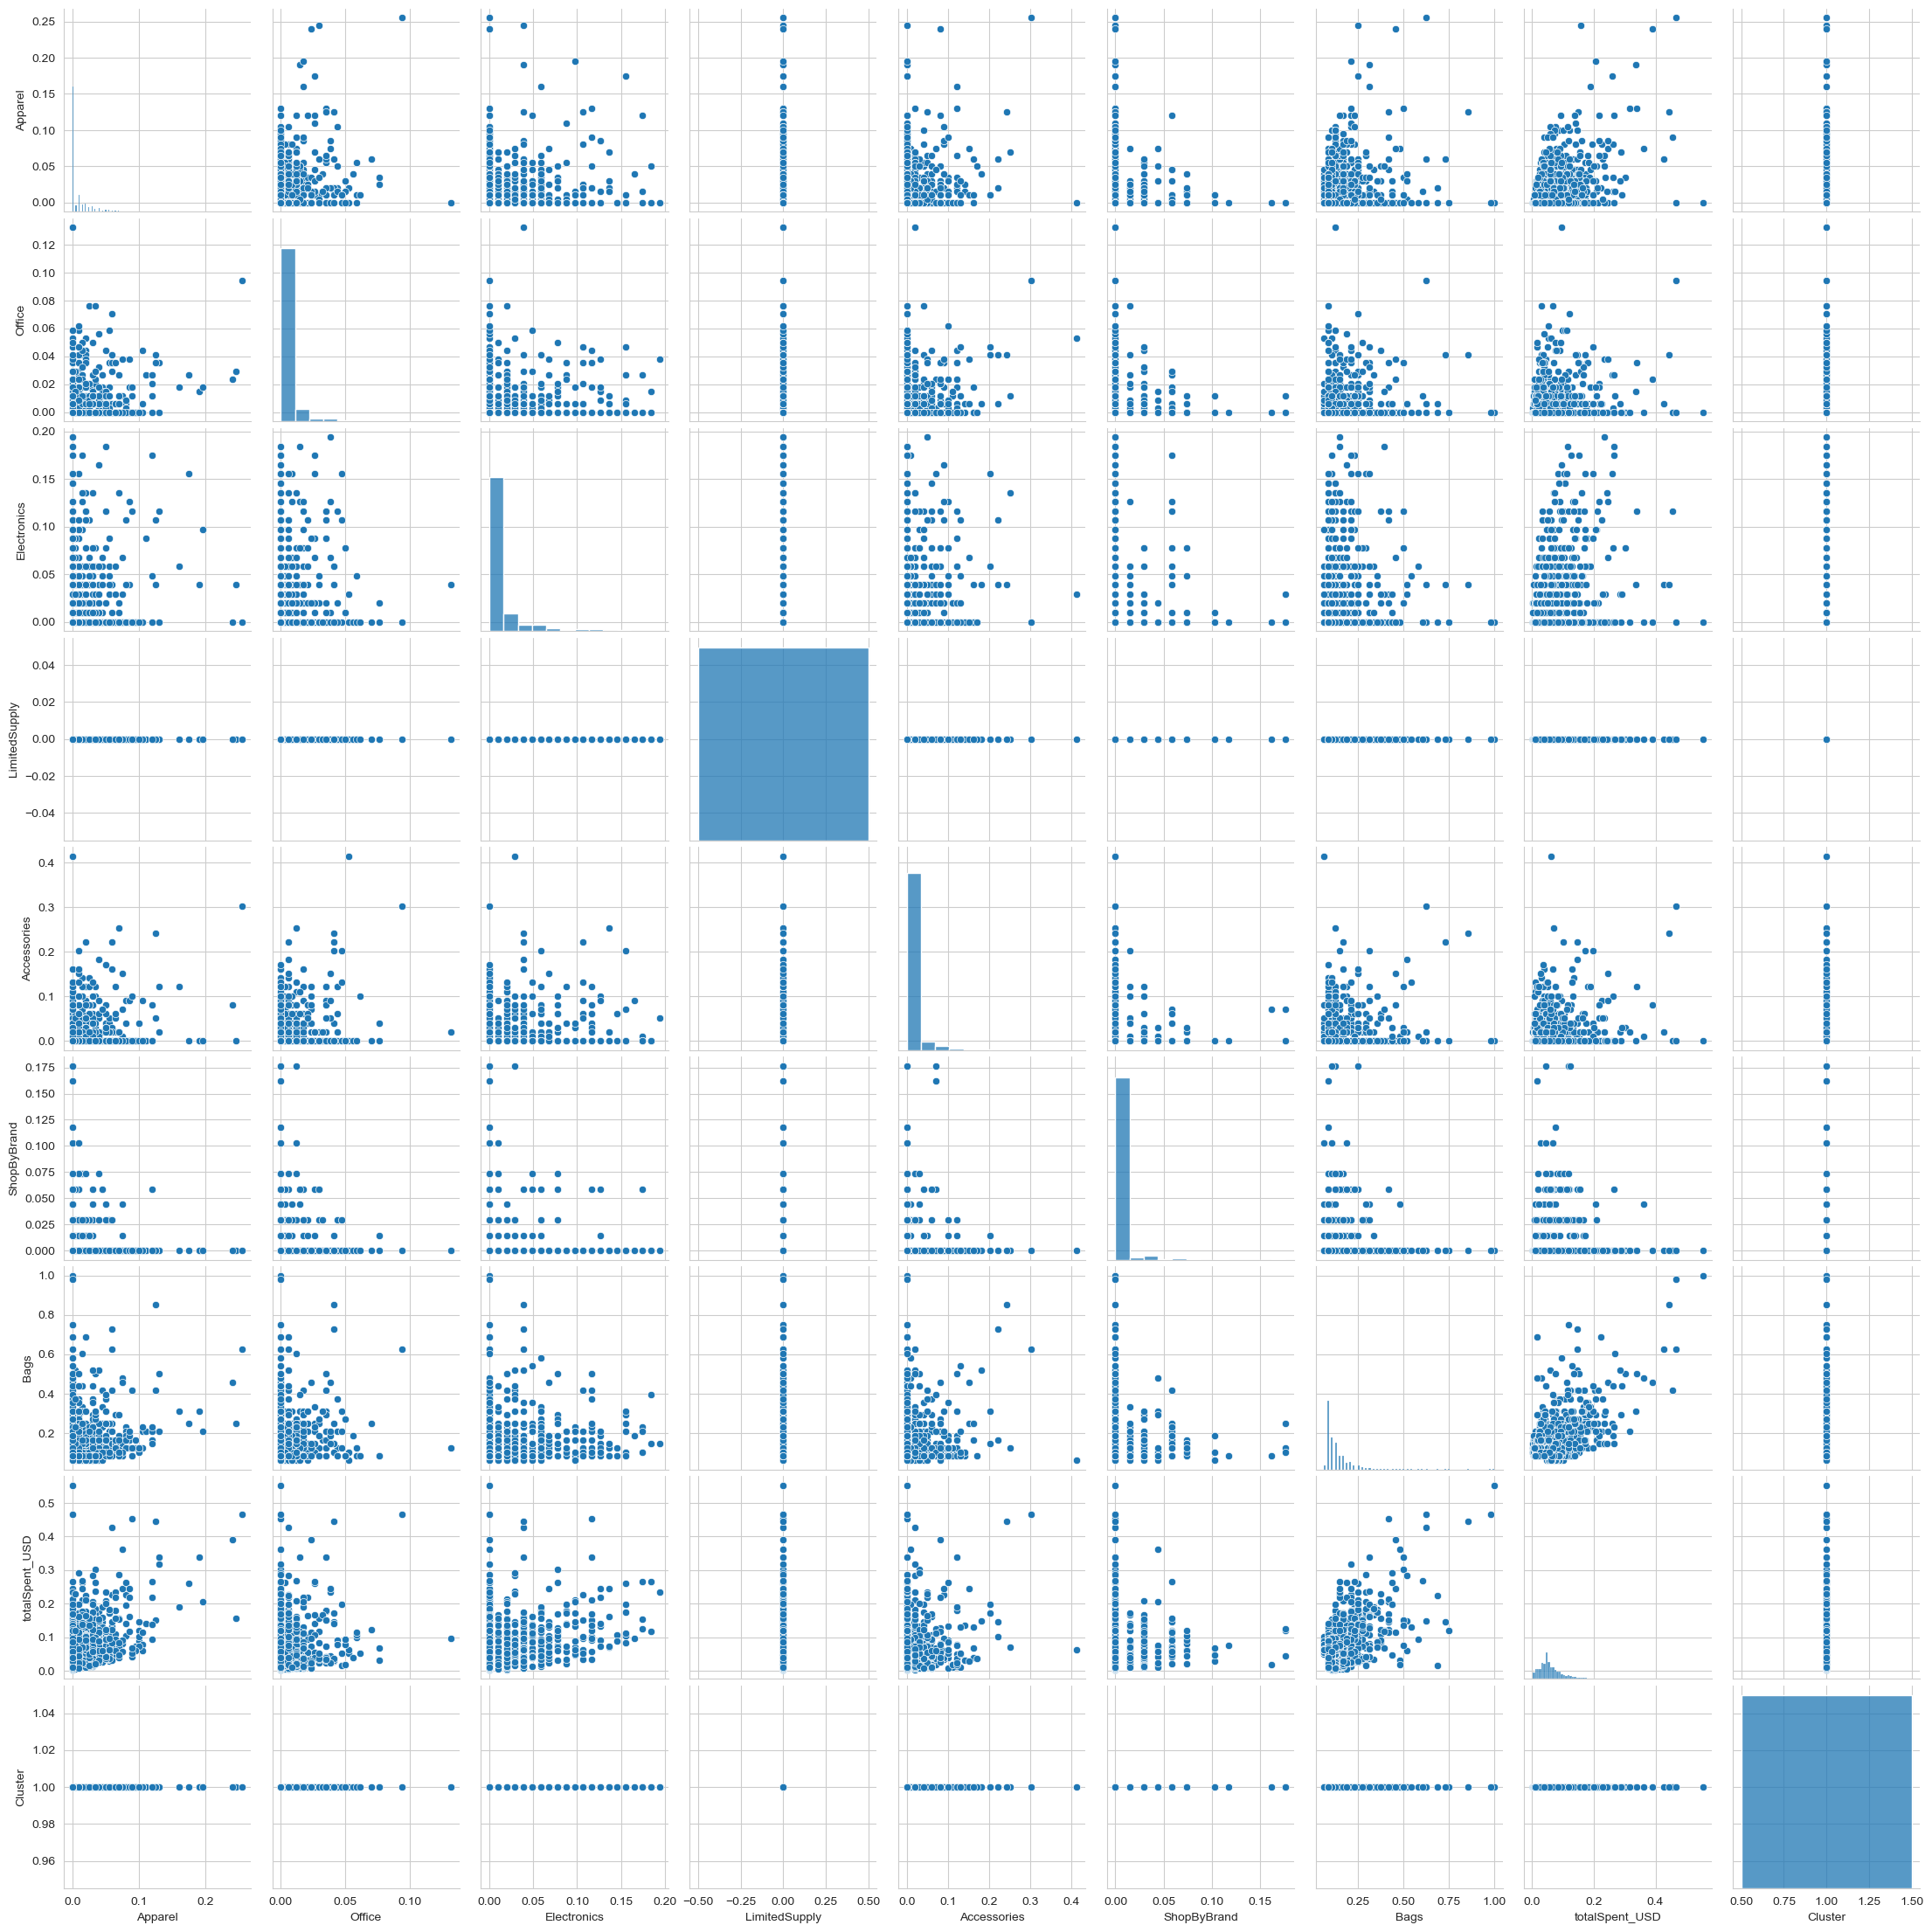

In [24]:
df1 = dataframe[dataframe['Cluster'] == 1]
sns.pairplot(df1)
plt.show()

In [22]:
# Gráficando los clusters por color y describiendo su centroide.
sns.set_style('whitegrid')
plt.figure(figsize=(15, 8))

# Graficando clusters
sns.scatterplot(x='Apparel', y='totalSpent_USD', data=df, hue='Cluster', palette='colorblind', alpha=0.9, s=140)

# Set title, axis labels & legend 
plt.title('K-Means Clustering', fontsize=12, fontweight='bold')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Display 
plt.show()

ValueError: Could not interpret value `Cluster` for parameter `hue`

In [ ]:
# import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
!pip install ydata-profiling
from ydata_profiling import ProfileReport

import seaborn as sns
import math
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score
import warnings
warnings.filterwarnings('ignore')


## DBSCAN